## Q1
TensorFlow tutorial showed me how to load the MNIST data, which gives me 4 numpy arrays.

https://www.tensorflow.org/tutorials/

I am interested in the x_train and x_test data, which I can convert to images.

I used shape to understand that x_train contains 60,000 28x28 matrix, and x_test contains 10,000 28x28 matrix.

Each image data is already 28x28 matrix, so I just use matplotlib to plot some images.

In this case, I print the first 3 examples from x_train.

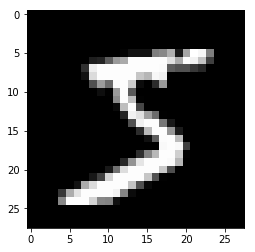

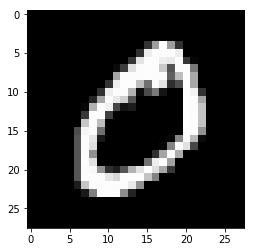

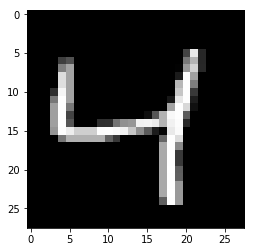

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
start = 0
end = 3
for i in range(start, end):
    plt.gray()
    plt.imshow(x_train[i])
    plt.show()

## Q2 a)

We want more training data to improve our models, but we often don't have a lot of data. So we want to make the best use of all the data and k-fold cross validation helps us do that.

In k-fold CV, we divide the evenly distributed data set into k equal-sized partitions and we use 1 partition as the testing data, and the other k-1 partitions as the training data. We do this for k rotations where we rotate which partition of data we use as the testing data. 

For example, in 10-fold CV, we initially use the 1st block as testing data, and the other 9 as training data. Then, we rotate and we use the 2nd block as test data and use the other 9 blocks as training data, and so on.

Each rotation of training and testing provides us a measure (such as accuracy), and we can average the k measures we got from k rotations, or we can study the distribution of the measures to gain more insights.

This allows us to make full use of our data set and help us understand what models and what hyperparameters lead to what accuracies, and we can select our models and hyperparameters from the result of k-fold cross validation.

## Q2 b)

my_cross_val_score is the script of my implementation of k-fold CV

model: the classifier model

x: the features

y: the labels

k: the k in k-fold CV

In [3]:
from sklearn.utils import resample
import numpy as np

def my_cross_val_score(model, x, y, k):
    if(k <= 1):
        print("k should be greater than 1")
        return
    
    # shuffle the input, since Iris data is grouped by labels, resample keeps x and y in order with one another
    x, y = resample(x, y, replace=False)
    
    scores = []
    
    size = x.shape[0]
    partition_size = size // k
    
    # k-fold CV
    for i in range (0, k):
        test_start = i * partition_size
        test_end = (i + 1) * partition_size
        
        x_train = np.concatenate((x[0:test_start], x[partition_size:size]), axis=0)
        y_train = np.concatenate((y[0:test_start], y[partition_size:size]), axis=0)
        x_test = x[test_start:test_end]
        y_test = y[test_start:test_end]
        
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        scores.append(np.mean(y_test == y_predicted))
        
    return np.array(scores)

Now, I'll compare my_cross_val_score with cross_val_score from sklearn

In [6]:
from sklearn import model_selection
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

iris_data = np.loadtxt('iris.data',delimiter=',')
x = iris_data[:,0:4]
y = iris_data[:,4]

# comparison when SVM is model, cv is 10 for both
print("When model is SVM")

sk_scores = model_selection.cross_val_score(svm.SVC(kernel='linear'), x, y, cv=10)
print("sk accuracy: %0.4f (+/- %0.4f)" % (sk_scores.mean(), sk_scores.std()))
print(sk_scores)

my_scores = my_cross_val_score(svm.SVC(kernel='linear'), x, y, 10)
print("my accuracy: %0.4f (+/- %0.4f)" % (my_scores.mean(), my_scores.std()))
print(my_scores)

# comparison when RF is model, cv is 10 for both
print("When model is random forest")

sk_scores = model_selection.cross_val_score(RandomForestClassifier(n_estimators=10), x, y, cv=10)
print("sk accuracy: %0.4f (+/- %0.4f)" % (sk_scores.mean(), sk_scores.std()))
print(sk_scores)

my_scores = my_cross_val_score(RandomForestClassifier(n_estimators=10), x, y, 10)
print("my accuracy: %0.4f (+/- %0.4f)" % (my_scores.mean(), my_scores.std()))
print(my_scores)

When model is SVM
sk accuracy: 0.9733 (+/- 0.0442)
[1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
my accuracy: 0.9800 (+/- 0.0427)
[0.86666667 1.         1.         1.         1.         1.
 1.         1.         1.         0.93333333]
When model is random forest
sk accuracy: 0.9533 (+/- 0.0521)
[1.         0.93333333 1.         0.93333333 0.86666667 0.86666667
 0.93333333 1.         1.         1.        ]
my accuracy: 0.9933 (+/- 0.0200)
[0.93333333 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


Based on the above result, I can see that accuracies generated by my function and sklearn's function aren't very different. 

They shouldn't be because the algorithms for k-fold cross validation should be similar. 

The difference in my accuracies and sklearn accuracies is probably of because the way I shuffled the dataset and splitted the dataset to k partitions is different from the way sklearn implemented it. 

Because the shuffling and partitions are different, the resulting accuracies are slightly different as well.

## Q2 c)

In [7]:
SVM_scores = model_selection.cross_val_score(svm.SVC(kernel='linear'), x, y, cv=10)
print("SVM accuracy: %0.4f (+/- %0.4f)" % (SVM_scores.mean(), SVM_scores.std()))
print(SVM_scores)

RF_scores = model_selection.cross_val_score(RandomForestClassifier(n_estimators=10), x, y, cv=10)
print("RF accuracy: %0.4f (+/- %0.4f)" % (RF_scores.mean(), RF_scores.std()))
print(RF_scores)

SVM accuracy: 0.9733 (+/- 0.0442)
[1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
RF accuracy: 0.9600 (+/- 0.0442)
[1.         0.93333333 1.         0.93333333 0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


From the above results, it seems that SVM provides more accuracy for this particular dataset if we use sklearn's cross validation accuracy score as our evaluation criteria. 

However, if I look at individual folds, I can see that both models achieve 100% accuracy in some folds. 

In addition, there are many measures for evaluating models other than just accuracy, such as recall or fall-out, and different users will use different measures to evaluate models and tune hyperparameters. 

Therefore, I can say that it is not sufficient to say that SVM is a better model than RF simply using cross validation scores. 

Furthermore, if I look at results from 2b), my function says RF has more accuracies than SVM. 

Therefore, I would say that whether SVM or RF is more suitable for a problem depends on the exact situation. 

And in this Iris data's case, I think SVM and RF are fairly equal if we are looking for high accuracy.

## Q3

My methodology is to:

1. Load the wine train data, get x and y
2. Use 10-fold cross validation of sklearn on the wine_train data with SVM, MLP, RF models with different hyperparameters
3. Choose the model and hyper parameter with best accuracy because I want high accuracy when classifying wine_test data
4. Use the model and hyper parameters from step 3 to classify wine_test data

I don't shuffle the data myself because sklearn's cross_val_score shuffles them somehow.

The reason I use 10 fold is because wine_train has 120 data points, so 10 fold feels about right to me for making good use of the wine_train data set.

In [8]:
import numpy as np
from sklearn.utils import resample
from sklearn import model_selection
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

wine_train = np.loadtxt('wine.train',delimiter=',')

x_train = wine_train[:,1:13]
y_train = np.int32(wine_train[:,0])

CV=10

scores = model_selection.cross_val_score(svm.SVC(kernel='linear'), x_train, y_train, cv=CV)
print("Accuracy on linear SVC: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

scores = model_selection.cross_val_score(svm.SVC(kernel='poly'), x_train, y_train, cv=CV)
print("Accuracy on poly SVC: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

scores = model_selection.cross_val_score(MLPClassifier(hidden_layer_sizes=(20, 30, 20)), x_train, y_train, cv=CV)
print("Accuracy on MLP: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

scores = model_selection.cross_val_score(RandomForestClassifier(n_estimators=5), x_train, y_train, cv=CV)
print("Accuracy on RF-5: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

scores = model_selection.cross_val_score(RandomForestClassifier(n_estimators=7), x_train, y_train, cv=CV)
print("Accuracy on RF-7: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

scores = model_selection.cross_val_score(RandomForestClassifier(n_estimators=10), x_train, y_train, cv=CV)
print("Accuracy on RF-10: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
                                         
scores = model_selection.cross_val_score(RandomForestClassifier(n_estimators=20), x_train, y_train, cv=CV)
print("Accuracy on RF-20: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

scores = model_selection.cross_val_score(RandomForestClassifier(n_estimators=40), x_train, y_train, cv=CV)
print("Accuracy on RF-40: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Accuracy on linear SVC: 0.9250 (+/- 0.0786)
Accuracy on poly SVC: 0.9500 (+/- 0.0764)
Accuracy on MLP: 0.3417 (+/- 0.0870)
Accuracy on RF-5: 0.9417 (+/- 0.0990)
Accuracy on RF-7: 0.9500 (+/- 0.0408)
Accuracy on RF-10: 0.9250 (+/- 0.0870)
Accuracy on RF-20: 0.9667 (+/- 0.0553)
Accuracy on RF-40: 0.9583 (+/- 0.0854)


Random Forest seems to be accurate for classifying this wine data, but actually each time I re-run the code above, the RF models give different accuracies, but generally speaking, RF models are pretty accurate for my purposes. So I will use RF-20 as my final model. Now, I will train the RF-20 model with all the wine_train data and classify wine_test.

In [9]:
model = RandomForestClassifier(n_estimators=20)

x_train = wine_train[:,1:13]
y_train = np.int32(wine_train[:,0])

model.fit(x_train,y_train)

wine_test = np.loadtxt('wine.test',delimiter=',')

x_test = wine_test[:,1:13]

y_predicted = model.predict(x_test)

np.savetxt("wine_test_labels.csv", y_predicted.astype(int), fmt='%i', delimiter=",")